In [52]:
from pathlib import Path
import torchvision.models as models
import pickle, math
import matplotlib.pyplot as plt
from torch import tensor
import numpy as np
import os
from torch_lr_finder import LRFinder
import sklearn
from PIL import Image
from torch.utils.data import Dataset

In [53]:
import pixiedust
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [55]:
torch.cuda.empty_cache()

In [56]:
transform= transforms.Compose([
    transforms.Resize((124,124)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [57]:
model =models.resnext50_32x4d(pretrained=True).to(device)

In [58]:
df = pd.read_csv('C:/Users/Iconsense/abhishek/projects/planet/train_v2.csv')

In [59]:
df.iloc[0,1]

'haze primary'

In [60]:
name=df.iloc[0,0]
lable=df.iloc[1,1]

In [61]:
name

'train_0'

In [62]:
lable

'agriculture clear primary water'

In [63]:
mlb = MultiLabelBinarizer()

In [64]:
a=mlb.fit_transform(df['tags'].str.split()).astype(np.float32)

In [65]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
a=torch.from_numpy(a)
a

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [67]:
img_name=df['image_name']
img_name

0            train_0
1            train_1
2            train_2
3            train_3
4            train_4
            ...     
40474    train_40474
40475    train_40475
40476    train_40476
40477    train_40477
40478    train_40478
Name: image_name, Length: 40479, dtype: object

In [68]:
img_dir="C:/Users/Iconsense/abhishek/projects/planet/train-jpg/"

In [69]:
len(df)

40479

In [70]:
for i in range(len(df)):
    ext=".jpg"
    img=(img_dir+img_name[i]+ext)

In [71]:
img

'C:/Users/Iconsense/abhishek/projects/planet/train-jpg/train_40478.jpg'

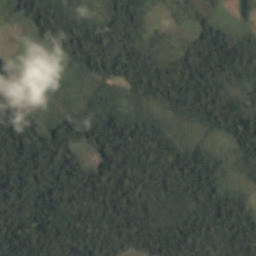

In [72]:
I=Image.open(img)
I.convert('RGB')


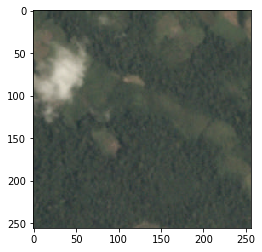

In [73]:
plt.imshow(I)

In [74]:

class planet(Dataset):
    def __init__(self,csv_path,img_dir,ext=".jpg",trans=transform):
        self.df=pd.read_csv(csv_path)
        self.image_dir=img_dir
        self.trans=trans
        
                
        self.img_name=df['image_name']
        
        
        self.label=mlb.fit_transform(df['tags'].str.split()).astype(np.float32)
        
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx=idx.tolist()
        
        img=Image.open(self.image_dir+self.img_name[idx]+ext)
        img=img.convert('RGB')
        
        label=torch.from_numpy(self.label[idx]).float()
        if self.trans is not None:
            img=self.trans(img)
            
        return img,label

In [75]:
csv='C:/Users/Iconsense/abhishek/projects/planet/train_v2.csv'

In [76]:
train=planet(csv,img_dir,transform)

In [77]:
train_set, val_set = torch.utils.data.random_split(train, [38479, 2000])

In [78]:
train_loader = DataLoader(train_set,
                          batch_size=64,
                          shuffle=True,)

In [79]:
val_set= DataLoader(train_set,
                          batch_size=64,
                          shuffle=True,)

In [80]:
a,b=(next(iter(train_loader)))
a,b

(tensor([[[[-1.4500, -1.5699, -1.5699,  ..., -1.4500, -1.5185, -1.4158],
           [-1.4672, -1.5870, -1.5870,  ..., -1.5014, -1.5357, -1.4672],
           [-1.6042, -1.5870, -1.5870,  ..., -1.6213, -1.5528, -1.5014],
           ...,
           [-1.5014, -1.5014, -1.5014,  ..., -1.6213, -1.5014, -1.3815],
           [-1.5528, -1.5699, -1.4158,  ..., -1.6042, -1.5185, -1.4158],
           [-1.5528, -1.5357, -1.3987,  ..., -1.5357, -1.4672, -1.4329]],
 
          [[-1.1253, -1.1954, -1.2479,  ..., -1.1429, -1.1779, -1.1429],
           [-1.1429, -1.2479, -1.2829,  ..., -1.1779, -1.1604, -1.1429],
           [-1.2129, -1.2654, -1.2654,  ..., -1.2829, -1.1779, -1.1604],
           ...,
           [-1.1253, -1.1604, -1.1429,  ..., -1.2829, -1.1429, -1.0903],
           [-1.2304, -1.2129, -1.0903,  ..., -1.2829, -1.1779, -1.0903],
           [-1.2479, -1.2304, -1.0903,  ..., -1.2304, -1.1604, -1.1253]],
 
          [[-1.0724, -1.1073, -1.1421,  ..., -1.1247, -1.1247, -1.0724],
           [-

In [81]:
cat=len(b[0])
cat

17

In [107]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.8)

In [108]:

for param in model.parameters():
    param.requires_grad=False

In [109]:

model.fc= nn.Sequential(nn.Linear(2048, 500),nn.ReLU(),nn.Linear(500,17),nn.Sigmoid()).to(device)
#y_prob = torch.sigmoid(model.fc)


model.fc.requires_grad=True

In [110]:
loss=nn.BCELoss()

In [111]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1


Learning rate search finished. See the graph with {finder_name}.plot()


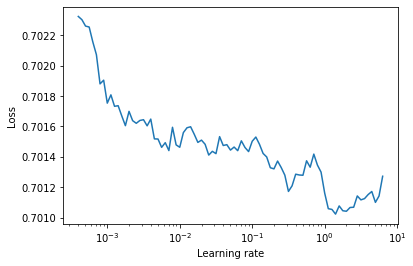

In [112]:
lr_finder = LRFinder(model, optimizer, loss, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

In [114]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [115]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [145]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            #print(xb,yb)
            loss = loss_func((model(xb)), yb)
            
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                #tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv)
    return tloss, vloss

In [146]:
ltrain,lval = fit(5, model, loss, optimizer, train_loader, val_set)

0 tensor(0.1290, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.1254, device='cuda:0')
1 tensor(0.1276, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.1251, device='cuda:0')
2 tensor(0.1266, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.1242, device='cuda:0')
3 tensor(0.1253, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.1217, device='cuda:0')
4 tensor(0.1248, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.1222, device='cuda:0')


In [147]:
img_dir="C:/Users/Iconsense/abhishek/projects/planet/train-jpg/"

In [148]:
data_dir = 'C:/Users/Iconsense/abhishek/projects/planet/'

In [149]:
torch.save(model, 'planet.pth')

In [162]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1=torch.load('planet.pth')


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

model(img)